# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Data Loaded.")

Data Loaded.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

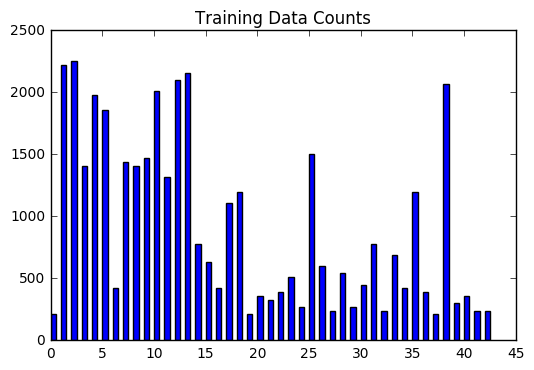

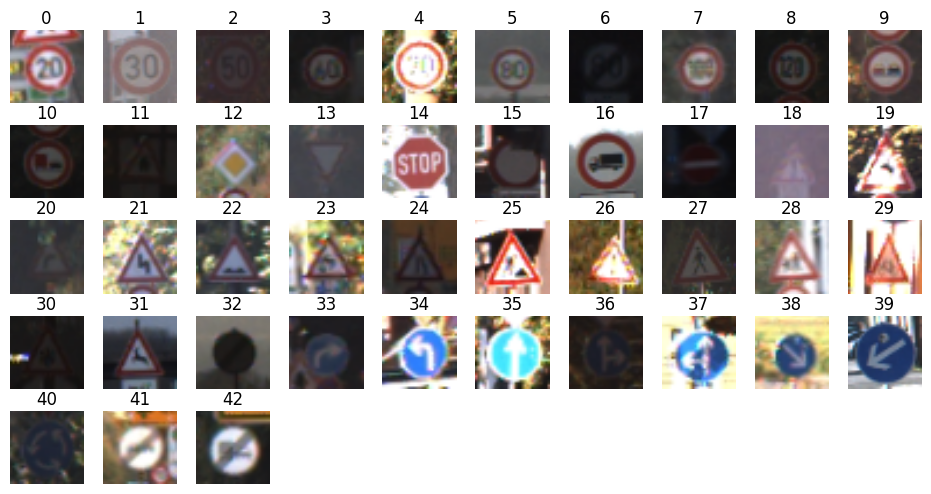

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

# plot a histogram of how many of each class are in the training and testing sets
bins = np.array(range(n_classes+1))
hist, edges = np.histogram(y_train, bins)
fig, ax = plt.subplots()
plt.title("Training Data Counts")
rects1 = ax.bar(range(n_classes), hist, width = 0.5, color='b')

# print one of each sign to see what they all look like
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.3) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(n_classes):
    indexes = np.where(y_train == i)[0]
    image = X_train[indexes[5]].squeeze()
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.title.set_text(i)
    #plt.subplot(10,10,i+1)
    plt.imshow(image)
    plt.axis('off')
    


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# function to generate greyscale image
import cv2

def toGreyscale(image):
    greyImg = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    greyImg = greyImg.reshape(greyImg.shape + (1,)) # ensure we have 1-size color channel
    return greyImg
    

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Reading various sources it looks like grey scale does as well as 
# color data, and sometimes beter.  So to simplify the project
# I will convert to greyscale images.

# 1) convert the training data
greyImages = []
for i in range(len(X_train)):
    greyImages.append(toGreyscale(X_train[i]) ) #grayscale conversion
greyImages = np.array(greyImages)
X_train = greyImages
print("Training images to greyscale", X_train.shape)

# 2) convert the test data also
greyTests = []
for i in range(len(X_test)):
    greyTests.append(toGreyscale(X_test[i]) ) #grayscale conversion
greyTests = np.array(greyTests)
X_test = greyTests
print("Test     images to greyscale", X_test.shape)

Training images to greyscale (39209, 32, 32, 1)
Test     images to greyscale (12630, 32, 32, 1)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [6]:
# Add images to the training set

# Any training images with fewer than 500 samples will need more samples.
# This fucntion will take an image, rotate by +10 and -10 degrees.
def addTrainingImages(inX, inY):
    rotAngle = 10 # rotate each image by 10 degrees
    size = image_shape[0]
    center = size/2
    rot_M1 = cv2.getRotationMatrix2D((center,center), rotAngle,1)
    rot_M2 = cv2.getRotationMatrix2D((center,center),-rotAngle,1)
    
    numImages = len(inX)
    numLabels = n_classes
    bins = np.array(range(numLabels+1))
    hist, edges = np.histogram(inY, bins)
    
    newImages = []
    newLabels = []
    for i in range(numLabels):
        if hist[i] < 501:
            # find indexes with this class name
            indexes = np.where(inY == i)[0]
            for ii in indexes:
                imageRot = cv2.warpAffine(inX[ii],rot_M1,(size,size))
                newImages.append(imageRot)
                newLabels.append(i)
                imageRot = cv2.warpAffine(inX[ii],rot_M2,(size,size))
                newImages.append(imageRot)
                newLabels.append(i)
    
    newImages = np.array(newImages)
    newImages = newImages.reshape(newImages.shape + (1,)) # ensure we have 1 color channel
    
    X_full = np.append(inX, newImages, axis=0)
    y_full = np.append(inY, newLabels, axis=0)
    print("Images and labels added: ",len(X_full)-numImages)
    return X_full, y_full


Images and labels added:  11940
Final Training   size:  48591
Final Validation size:  2558
Data shuffled


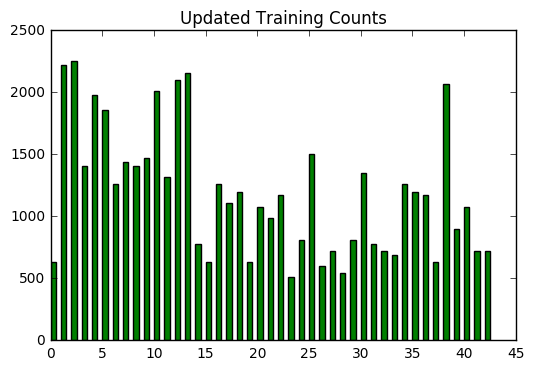

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train, y_train = addTrainingImages(X_train, y_train)
# compute updated histogram
hist, edges = np.histogram(y_train, bins)
fig, ax = plt.subplots()
plt.title("Updated Training Counts")
rects1 = ax.bar(range(n_classes), hist, width = 0.5, color='g')


# Now we will split the training data into training and validation sets
VAL_RATIO = 0.05

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=VAL_RATIO, random_state=15)
print("Final Training   size: ", len(X_train))
print("Final Validation size: ", len(X_validation))



# To aviod training on the order of our images, we will also shuffle
# the training set
X_train, y_train = shuffle(X_train, y_train)
print("Data shuffled")

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# global settings
MU = 0
SIGMA = 0.05
EPOCHS = 25
BATCH_SIZE = 128
FILTER_SIZE = 5
LEARNING_RATE = 0.001

# convenience function to generate a convolutional variable
def genConvVar(filter_size, depth1, depth2):
    return tf.Variable(tf.truncated_normal([filter_size, filter_size, depth1, depth2], mean=MU, stddev=SIGMA))

# convenience function to generate a flat matrix variable
def genFlatVar(depth1, depth2):
    return tf.Variable(tf.truncated_normal([depth1, depth2], mean=MU, stddev=SIGMA))

In [9]:
# Network inputs

layer_depths = {
    'layer_0': 1, # starting with 1 color (greyscale)
    'layer_1': 12,
    'layer_2': 24,
    'layer_3': 120,
    'layer_4': 84,
    'layer_5': n_classes
}
layer_2_flat_size = FILTER_SIZE*FILTER_SIZE * layer_depths['layer_2']

weights = {
    'layer_1': genConvVar(FILTER_SIZE, layer_depths['layer_0'], layer_depths['layer_1']),
    'layer_2': genConvVar(FILTER_SIZE, layer_depths['layer_1'], layer_depths['layer_2']),
    'layer_3': genFlatVar(layer_2_flat_size,      layer_depths['layer_3']),
    'layer_4': genFlatVar(layer_depths['layer_3'], layer_depths['layer_4']),
    'layer_5': genFlatVar(layer_depths['layer_4'], layer_depths['layer_5'])
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depths['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depths['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_depths['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_depths['layer_4'])),
    'layer_5': tf.Variable(tf.zeros(layer_depths['layer_5']))
}

In [10]:
# Model definition

strides_NN   = [1,1,1,1]
strides_Pool = [1,2,2,1]

def LeNet(x):
    # Layer 1: Convolution.
    x = tf.nn.conv2d(x, weights['layer_1'], strides=strides_NN, padding='VALID')
    x = tf.nn.bias_add(x, biases['layer_1'])
    x = tf.nn.relu(x)# Activation.
    lay1_out = tf.nn.max_pool(x, ksize=strides_Pool, strides=strides_Pool, padding='VALID')
    
    # Layer 2: Convolution.
    x = tf.nn.conv2d(lay1_out, weights['layer_2'], strides=strides_NN, padding='VALID')
    x = tf.nn.bias_add(x, biases['layer_2'])
    x = tf.nn.relu(x) # Activation.
    lay2_out = tf.nn.max_pool(x, ksize=strides_Pool, strides=strides_Pool, padding='VALID')
    # Flatten for next layer
    lay2_flat = tf.contrib.layers.flatten(lay2_out)
    
    # Layer 3: Fully Connected.
    x = tf.add(tf.matmul(lay2_flat, weights['layer_3']), biases['layer_3'])
    lay3_out = tf.nn.relu(x)# Activation.

    # Layer 4: Fully Connected.
    x = tf.add(tf.matmul(lay3_out, weights['layer_4']), biases['layer_4'])
    lay4_out = tf.nn.relu(x)# Activation.

    # Layer 5: Fully Connected. Final
    logits = tf.add(tf.matmul(lay4_out, weights['layer_5']), biases['layer_5'])
    
    return logits
    

In [11]:
# Set up input variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [12]:
# Set up the training pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

In [13]:
# set up training evaluation system
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        batch_i = 0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_i += 1
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.944



KeyboardInterrupt: 

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

new_images = []
new_labels = []
fileNames = os.listdir("new_images/")
for fileName in fileNames:
    if 'jpg' not in fileName and 'jpeg' not in fileName:
        continue
    basename = fileName.split('.')[0]
    signID   = basename.split(',')[1]
    fullName = os.path.join("new_images",fileName)
    image = mpimg.imread(fullName)
    image = toGreyscale(image)
    new_images.append(image)
    new_labels.append(int(signID))

new_images = np.array(new_images)
new_labels = np.array(new_labels)


# plot each test image to see what they all look like
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.3) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(len(new_labels)):
    image = new_images[i].squeeze()
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.title.set_text(new_labels[i])
    plt.imshow(image, cmap='gray')
    plt.axis('off')


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(new_images, new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_calc = tf.nn.softmax(logits)
top5 = tf.nn.top_k(softmax_calc, k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    best = sess.run(top5, feed_dict={x: new_images, y: new_labels})
    print(best[0])
    print(best[1])
    print(new_labels)

# look at sign vs errors

for i in range(len(new_labels)):
    foundClass = best[1][i][0]
    rightClass = new_labels[i]
    if foundClass != rightClass:
        print("Wrong: Image {:2d} classed as {:2d}, should be {:2d}".format(i,foundClass,rightClass))



In [ ]:
# look at sign vs errors
print("Columns: Test Image,    Classified as,    Should be")
for i in range(len(new_labels)):
    foundClass = best[1][i][0]
    rightClass = new_labels[i]
    if foundClass == rightClass:
        continue
    wrongIndex = np.where(y_train == foundClass)[0][0]
    rightIndex = np.where(y_train == rightClass)[0][0]
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.title.set_text(new_labels[i])
    ax2.title.set_text(foundClass)
    ax3.title.set_text(rightClass)
    image1 = new_images[i].squeeze()
    image2 = X_train[wrongIndex].squeeze()
    image3 = X_train[rightIndex].squeeze()
    ax1.imshow(image1, cmap='gray')
    ax2.imshow(image2, cmap='gray')
    ax3.imshow(image3, cmap='gray')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.